<a href="https://colab.research.google.com/github/butil47/bid-data-analytic/blob/main/Big_Data_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataframe = pd.read_csv(" https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
dataframe.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

 exploring the data

In [ ]:
print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

# Data Cleaning

 dealing with missing values
imdb_id 10856 cast 10790 genres 10843 production_companies 9836

removing rows where revenue_adj and budget_adj is equal to zero


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#remving movies which have no cast, geners or with budget_adj & revenue_adj=0
dataframe = dataframe[dataframe["cast"].isnull() == False]
dataframe = dataframe[dataframe["genres"].isnull() == False]


dataframe = dataframe[dataframe.budget_adj != 0]
dataframe = dataframe[dataframe.revenue_adj != 0]

In [ ]:
#removing movies with no imdb_id or production_companies
dataframe = dataframe[dataframe["imdb_id"].isnull() == False]
dataframe = dataframe[dataframe["production_companies"].isnull() == False]

In [ ]:
dataframe.shape

(3807, 21)

In [ ]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format
dataframe['release_date']=pd.to_datetime(dataframe['release_date'])
dataframe['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

# chech for duplicates and remove them

In [ ]:
dataframe.duplicated().sum()

1

In [ ]:
dataframe.drop_duplicates(inplace=True)

In [ ]:
dataframe.duplicated().sum()

0

Check for null values and removing them

In [ ]:
dataframe.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                2395
director                   1
tagline                  262
keywords                 129
overview                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
dataframe.dropna(axis=1,inplace=True)

In [ ]:
dataframe.shape

(3806, 21)

In [ ]:
dataframe.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15       5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

# Handling Outliers
##Z-Score Calculation:

The z-score measures how many standard deviations a data point is from the mean.
For each value in a numerical column, the z-score is calculated using the zscore function from the scipy.stats module.

Typically, a z-score threshold of -3 to 3 is used to identify outliers.
Values outside this range are considered as potential outliers.

The DataFrame is then filtered to keep only the rows where the z-score falls within the specified range.
This removes data points that are considered outliers based on the z-score criterion.

In [ ]:
# Import the zscore function from the scipy.stats module
from scipy.stats import zscore

# Calculate the z-score for each value in the 'value' column
dataframe['z_score'] = zscore(dataframe['popularity'])

# Keep only the rows where the z-score is within a certain range, e.g., -3 to 3
dataframe = dataframe[(dataframe['z_score'] < 3) & (dataframe['z_score'] > -3)]

# Feature Engineering
Feature engineering is the process of creating new features or modifying existing ones in a dataset to enhance the performance of the data analysis. It involves selecting, transforming, or creating variables that help the model better understand the underlying patterns in the data.

In [ ]:
#feature engineering
#feature 1
#Runtime binning: Group movies into categories based on their runtime to identify relationships between movie length and other variables.

#define the intervals for categorizing runtimes.
#In this case, movies are categorized into three bins: 'short' (0 to 90 minutes), 'medium' (91 to 120 minutes), and 'long' (121 minutes and above)
runtime_bins = [0, 90, 120, float('inf')]

# label for each bins
runtime_labels = ['short', 'medium', 'long']

# Create a new column 'runtime_category' based on the 'runtime' column
dataframe['runtime_category'] = pd.cut(dataframe['runtime'], bins=runtime_bins, labels=runtime_labels)
# Feature 2: Revenue-to-Budget Ratio
dataframe['revenue_to_budget_ratio'] = dataframe['revenue'] / dataframe['budget']

# Feature 3: Popularity and Vote Averages Interaction
dataframe['popularity_vote_avg_interaction'] = dataframe['popularity'] * dataframe['vote_average']

#cleaning the data after feature engineering
dataframe= dataframe.dropna()

# print the updated data frame
print(dataframe.head())


        id    imdb_id  popularity     budget    revenue  \
17  102899  tt0478970    5.573184  130000000  518602163   
19  131634  tt1951266    5.476958  160000000  650523427   
20  158852  tt1964418    5.462138  190000000  209035668   
22  254128  tt2126355    4.907832  110000000  470490832   
23  216015  tt2322441    4.710402   40000000  569651467   

                           original_title  \
17                                Ant-Man   
19  The Hunger Games: Mockingjay - Part 2   
20                           Tomorrowland   
22                            San Andreas   
23                   Fifty Shades of Grey   

                                                 cast  \
17  Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...   
19  Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...   
20  Britt Robertson|George Clooney|Raffey Cassidy|...   
22  Dwayne Johnson|Alexandra Daddario|Carla Gugino...   
23  Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...   

                               

# exploratory data analysis
exploring the distribution and the relation among variables

                  id   popularity        budget       revenue      runtime  \
count    1229.000000  1229.000000  1.229000e+03  1.229000e+03  1229.000000   
mean    50204.240033     1.454542  4.872213e+07  1.519750e+08   109.244101   
std     72407.460743     1.114367  5.196131e+07  2.041352e+08    17.796872   
min        12.000000     0.010335  1.000000e+00  4.300000e+01    63.000000   
25%      5857.000000     0.645064  1.300000e+07  2.334157e+07    96.000000   
50%     19898.000000     1.111487  3.000000e+07  7.495230e+07   107.000000   
75%     59296.000000     1.926432  6.500000e+07  1.933558e+08   119.000000   
max    333348.000000     5.603587  4.250000e+08  1.845034e+09   195.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  \
count  1229.000000   1229.000000   1229.000000  1.229000e+03  1.229000e+03   
mean    791.643613      6.235883   2006.903173  5.155842e+07  1.736197e+08   
std     970.924026      0.772569      8.003942  5.275643e+07  2

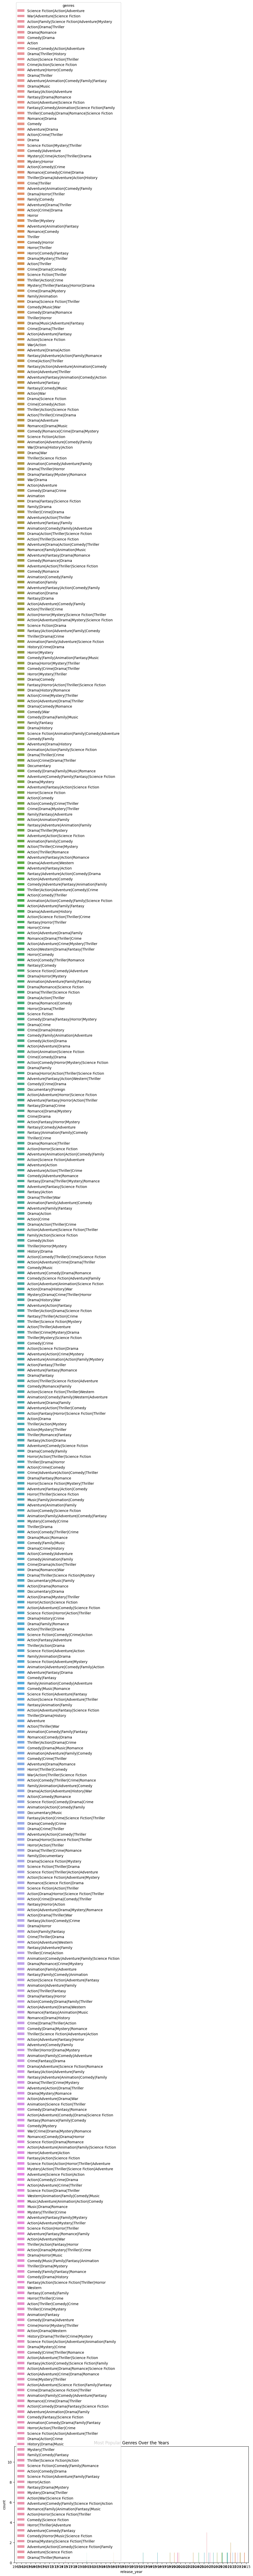

In [ ]:
#exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print(dataframe.describe())

# Visualizations
# Most Popular Genres Over the Years
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='genres', data=dataframe)
plt.title('Most Popular Genres Over the Years')
plt.show()

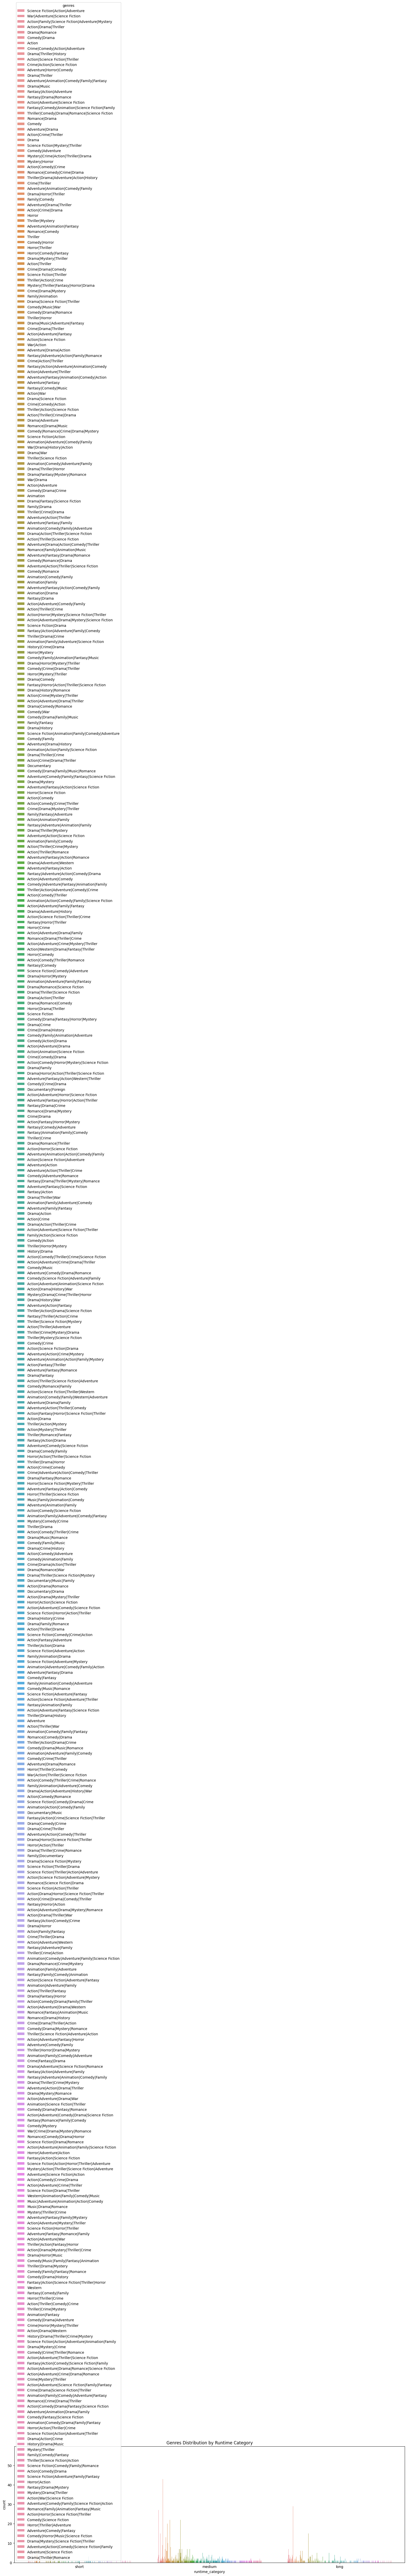

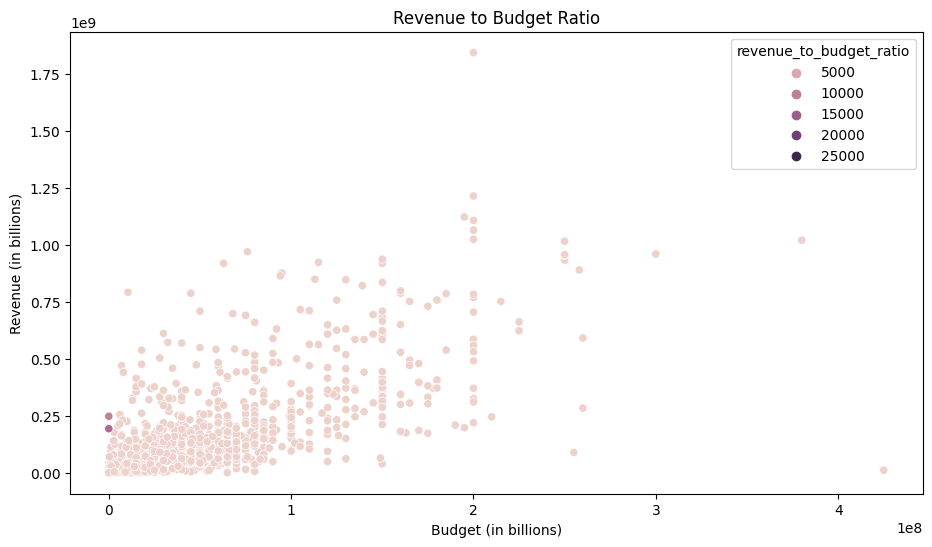

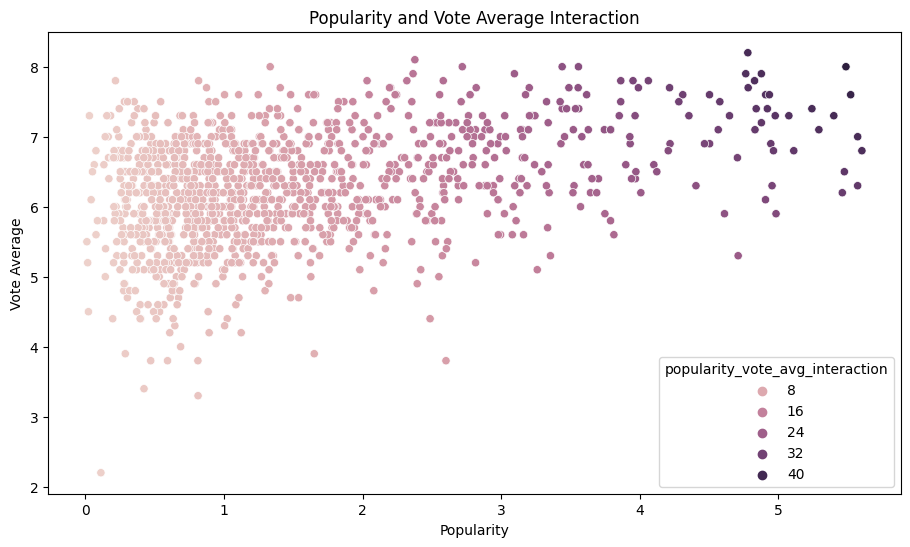

In [ ]:
# Runtime Binning
plt.figure(figsize=(20, 6))
sns.countplot(x='runtime_category', hue='genres', data=dataframe)
plt.title('Genres Distribution by Runtime Category')
plt.show()

# Revenue to Budget Ratio
plt.figure(figsize=(11, 6))
sns.scatterplot(x='budget', y='revenue', hue='revenue_to_budget_ratio', data=dataframe)
plt.title('Revenue to Budget Ratio')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.show()

# Popularity and Vote Average Interaction
plt.figure(figsize=(11, 6))
sns.scatterplot(x='popularity', y='vote_average', hue='popularity_vote_avg_interaction', data=dataframe)
plt.title('Popularity and Vote Average Interaction')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# Draw Conclusion
So based on the analysis lets see if we can adress the questions posed on the first phase

In [ ]:
# what are the most popular genre for each year
popular_genres = dataframe.groupby('release_year')['genres'].value_counts().groupby('release_year').idxmax().reset_index()
print(popular_genres)


    release_year                                             genres
0           1961                              (1961, Comedy|Family)
1           1962                  (1962, Adventure|Action|Thriller)
2           1963                  (1963, Action|Thriller|Adventure)
3           1964                  (1964, Adventure|Action|Thriller)
4           1965                  (1965, Adventure|Action|Thriller)
5           1967                  (1967, Action|Thriller|Adventure)
6           1969                  (1969, Adventure|Action|Thriller)
7           1971                      (1971, Action|Crime|Thriller)
8           1973                  (1973, Adventure|Action|Thriller)
9           1974                  (1974, Adventure|Action|Thriller)
10          1975                   (1975, Adventure|Comedy|Fantasy)
11          1977                  (1977, Adventure|Action|Thriller)
12          1978                                     (1978, Comedy)
13          1979  (1979, Action|Adventure|Thrill

In [ ]:
# How many movies are made in each genre
genres_encoded = dataframe['genres'].str.get_dummies('|')
genre_counts = genres_encoded.sum().sort_values(ascending=False)
print(genre_counts)

Drama              522
Comedy             408
Thriller           380
Action             378
Adventure          263
Romance            196
Crime              185
Science Fiction    181
Family             154
Horror             138
Fantasy            138
Animation          103
Mystery             94
Music               38
History             34
War                 30
Documentary         15
Western             10
Foreign              1
dtype: int64


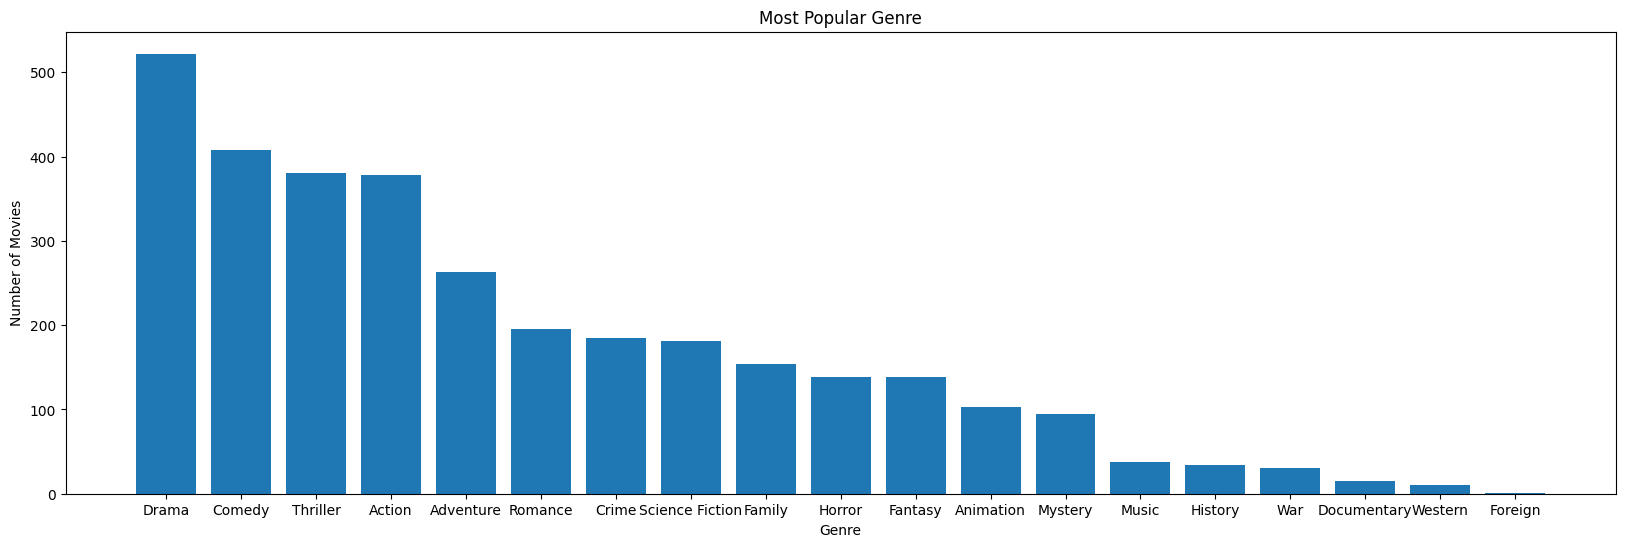

In [ ]:
# what is the most popular genre
df_genres = dataframe['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Count the occurrences of each genre
genre_counts = df_genres.value_counts()

# Plot the most popular genre
plt.figure(figsize=(20, 6))
plt.bar(genre_counts.index, genre_counts)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Most Popular Genre')
plt.show()

In [ ]:
# Define a threshold for "high revenue" movies
high_revenue_movies = dataframe[dataframe["revenue"] > 100000000]  # Adjust threshold as needed

# Analyze properties of high-revenue movies
high_revenue_movies.describe()
high_revenue_movies.corr()  # Explore correlations between variables



<ipython-input-49-596bb812c618>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_revenue_movies.corr()  # Explore correlations between variables


id  popularity    budget   revenue  \
id                               1.000000    0.171800 -0.028288 -0.081786   
popularity                       0.171800    1.000000  0.350102  0.520587   
budget                          -0.028288    0.350102  1.000000  0.599192   
revenue                         -0.081786    0.520587  0.599192  1.000000   
runtime                         -0.012762    0.250907  0.206091  0.232339   
vote_count                       0.056096    0.717838  0.440049  0.677492   
vote_average                    -0.016730    0.409247 -0.101854  0.236297   
release_year                     0.491748    0.024759  0.307100  0.038584   
budget_adj                      -0.129152    0.345389  0.976356  0.617972   
revenue_adj                     -0.194120    0.458578  0.353506  0.853153   
z_score                          0.171800    1.000000  0.350102  0.520587   
revenue_to_budget_ratio         -0.027877   -0.055491 -0.092116 -0.024309   
popularity_vote_avg_interaction  0.147707    0.984061  0.296484  0.519918   

                                  runtime  vote_count  vote_average  \
id                              -0.012762    0.056096     -0.016730   
popularity                       0.250907    0.717838      0.409247   
budget                           0.206091    0.440049     -0.101854   
revenue                          0.232339    0.677492      0.236297   
runtime                          1.000000    0.285595      0.339873   
vote_count                       0.285595    1.000000      0.451320   
vote_average                     0.339873    0.451320      1.000000   
release_year                    -0.106251    0.146602     -0.168338   
budget_adj                       0.241511    0.414393     -0.085980   
revenue_adj                      0.232018    0.532821      0.288653   
z_score                          0.250907    0.717838      0.409247   
revenue_to_budget_ratio         -0.096207   -0.041985     -0.017897   
popularity_vote_avg_interaction  0.274283    0.739972      0.541178   

                                 release_year  budget_adj  revenue_adj  \
id                                   0.491748   -0.129152    -0.194120   
popularity                           0.024759    0.345389     0.458578   
budget                               0.307100    0.976356     0.353506   
revenue                              0.038584    0.617972     0.853153   
runtime                             -0.106251    0.241511     0.232018   
vote_count                           0.146602    0.414393     0.532821   
vote_average                        -0.168338   -0.085980     0.288653   
release_year                         1.000000    0.133562    -0.387737   
budget_adj                           0.133562    1.000000     0.437224   
revenue_adj                         -0.387737    0.437224     1.000000   
z_score                              0.024759    0.345389     0.458578   
revenue_to_budget_ratio             -0.027219   -0.098118    -0.016429   
popularity_vote_avg_interaction     -0.013150    0.296246     0.476176   

                                  z_score  revenue_to_budget_ratio  \
id                               0.171800                -0.027877   
popularity                       1.000000                -0.055491   
budget                           0.350102                -0.092116   
revenue                          0.520587                -0.024309   
runtime                          0.250907                -0.096207   
vote_count                       0.717838                -0.041985   
vote_average                     0.409247                -0.017897   
release_year                     0.024759                -0.027219   
budget_adj                       0.345389                -0.098118   
revenue_adj                      0.458578                -0.016429   
z_score                          1.000000                -0.055491   
revenue_to_budget_ratio         -0.055491                 1.000000   
popularity_vote_av